In [5]:
fp = './2024c/processed_data/2023-wimbledon-1502'
from pandas import read_csv, DataFrame
from matplotlib.pyplot import plot, subplots, show
from statsmodels.tsa.arima.model import ARIMA
from tqdm import trange
from statsmodels.graphics.tsaplots import plot_predict

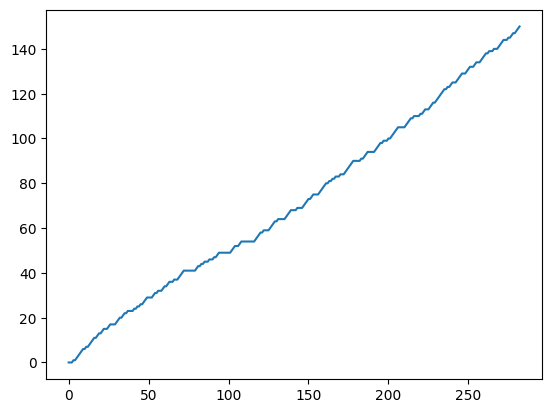

In [6]:
df = read_csv(fp)
df.head()
p1_scores, p2_scores = df['p1_points_won'].to_list(), df['p2_points_won'].to_list()
plot(p1_scores)

c:\Users\Lithium\OneDrive\桌面\preMCM\.env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lithium\OneDrive\桌面\preMCM\.env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Lithium\OneDrive\桌面\preMCM\.env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


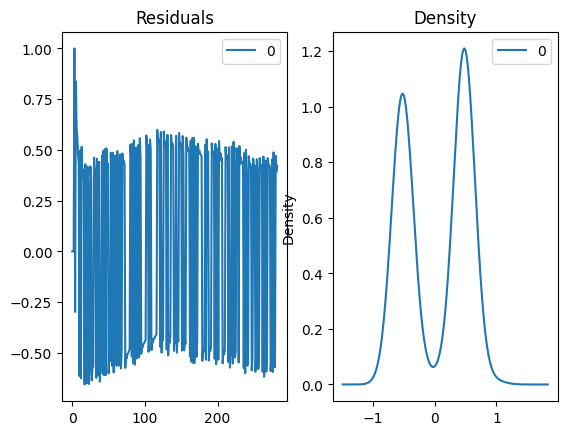

c:\Users\Lithium\OneDrive\桌面\preMCM\.env\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['color']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


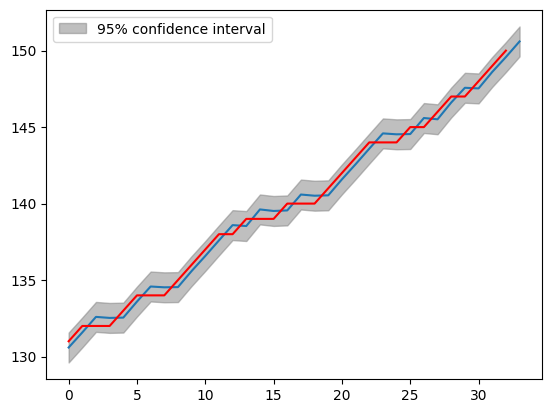

In [11]:
start = 10
window_size = 5
history = p1_scores[:start]
predictions = []
model = ARIMA(endog=p1_scores, order=(2,1,2))
model_fit = model.fit()
# for i in trange(start,len(p1_scores)):
    # try:
        # history.append(p1_scores[i])
        # output = model_fit.predict(start=i-window_size, end=i)[-1]
        # predictions.append(output)
    # except:
        # print("LU error!")
        # continue

residuals = DataFrame(model_fit.resid)
fig, ax = subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
show()

plot_predict(model_fit, start=start+240, end=len(p1_scores), dynamic=False, color='blue')
plot(p1_scores[start+240:], color='red')
show()

In [8]:
# auto arima
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error 

In [9]:
model = pm.auto_arima(
    p1_scores,
    n_jobs=-1,
    trend='c',
    stepwise=False
)


In [10]:
model

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True, trend='c')